In [1]:
from pyforest import *
lazy_imports()

import warnings
warnings.filterwarnings("ignore")

In [2]:
Train_data=pd.read_csv("E:/Full Stack Data Scientist Bootcamp/project resources-20230222T174121Z-001/project resources/amazontrain.csv")
Train_data.head()

<IPython.core.display.Javascript object>

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [3]:
Test_data=pd.read_csv("E:/Full Stack Data Scientist Bootcamp/project resources-20230222T174121Z-001/project resources/amazontest.csv")
Test_data.head()

<IPython.core.display.Javascript object>

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [4]:
Train_data.shape

(32769, 10)

In [5]:
Test_data.shape

(58921, 10)

In [6]:
# !pip install catboost

In [8]:
from catboost.datasets import amazon
traindf, testdf = amazon()

In [10]:
traindf.shape

(32769, 10)

In [11]:
testdf.shape

(58921, 10)

In [12]:
traindf

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...,...,...
32764,1,23497,16971,117961,118300,119993,118321,240983,290919,118322
32765,1,25139,311198,91261,118026,122392,121143,173805,249618,121145
32766,1,34924,28805,117961,118327,120299,124922,152038,118612,124924
32767,1,80574,55643,118256,118257,117945,280788,280788,292795,119082


In [13]:
testdf

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425
...,...,...,...,...,...,...,...,...,...,...
58916,58917,75078,4565,117961,118386,121961,118784,117906,290919,118786
58917,58918,6977,72209,117961,118225,124948,118054,118054,117887,118055
58918,58919,39262,6114,117961,118343,6104,118278,118260,290919,118279
58919,58920,1023,8674,117961,118327,120318,118321,117906,290919,118322


In [16]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [24]:
traindf.apply(lambda x : len(x. unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [27]:
traindf['MGR_ID'].value_counts()

770      152
2270      99
2594      82
1350      71
2014      67
        ... 
97000      1
81506      1
12517      1
50296      1
22355      1
Name: MGR_ID, Length: 4243, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

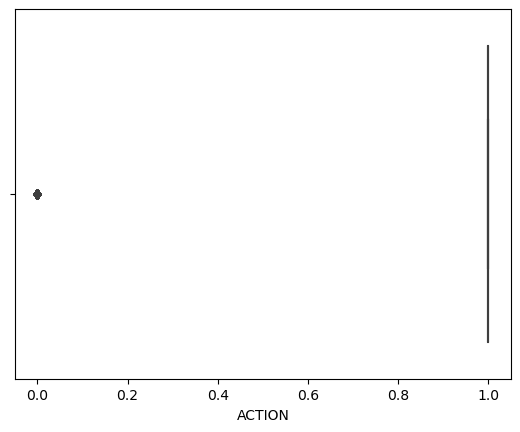

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

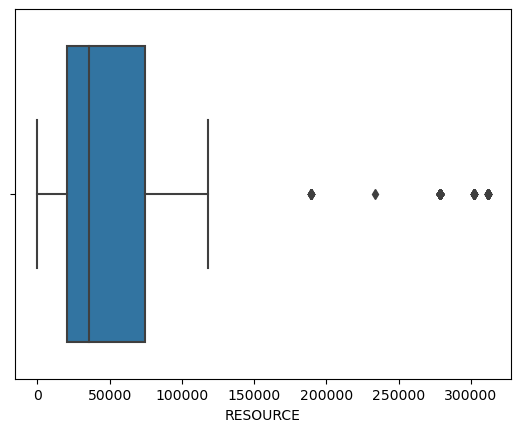

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

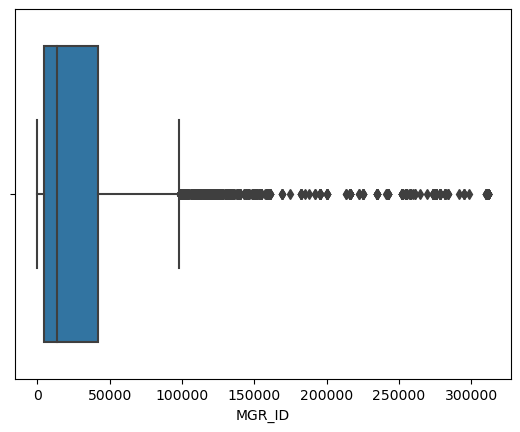

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

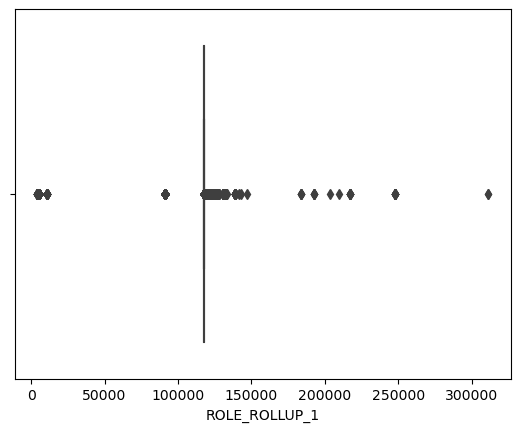

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

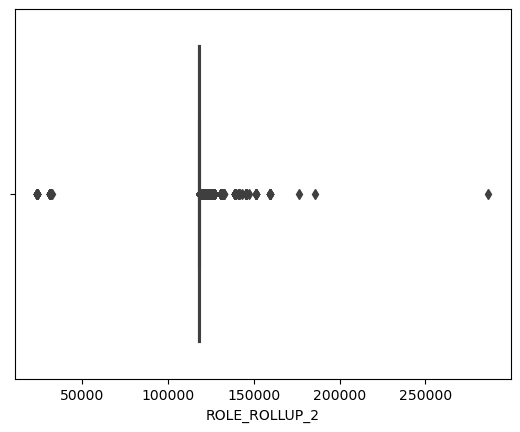

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

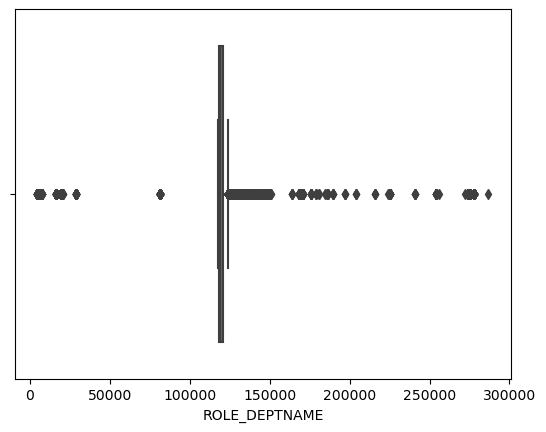

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

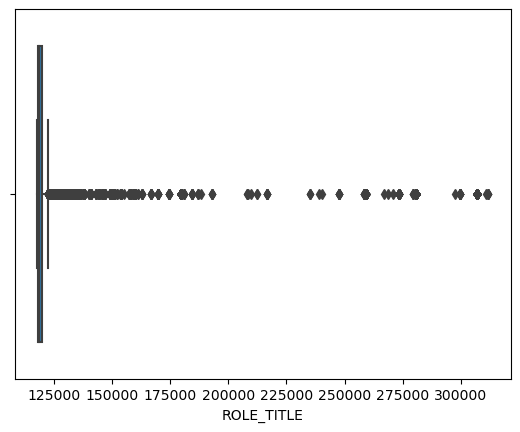

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

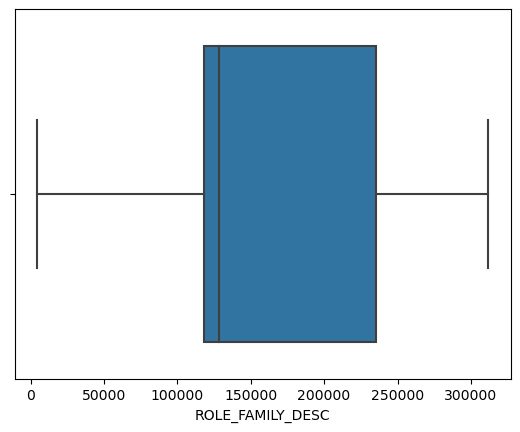

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

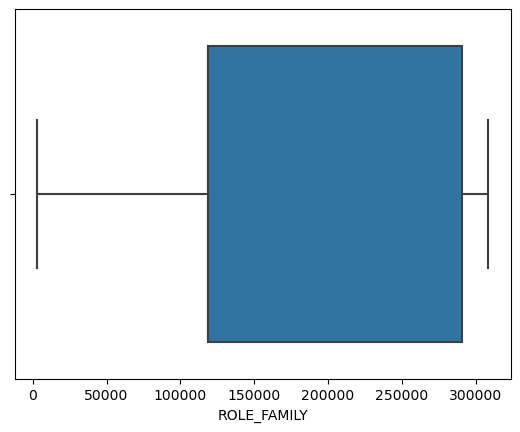

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

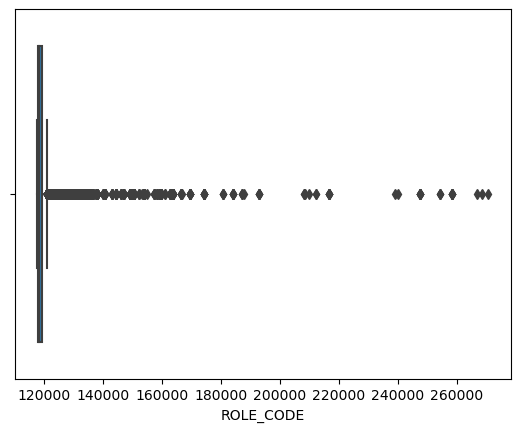

In [28]:
for i in traindf.describe().columns:
    sns.boxplot(traindf[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

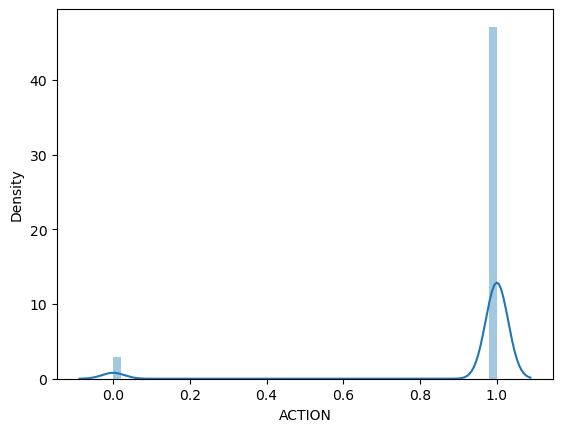

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

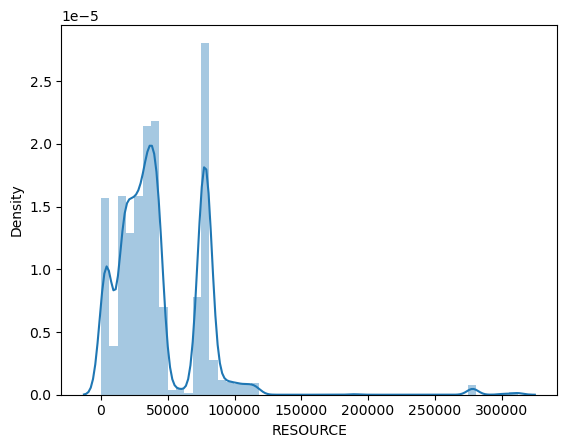

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

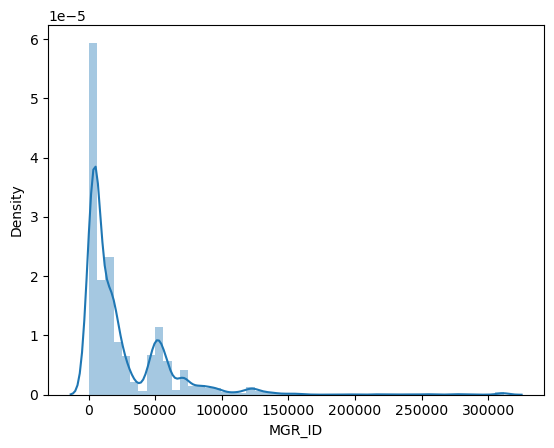

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

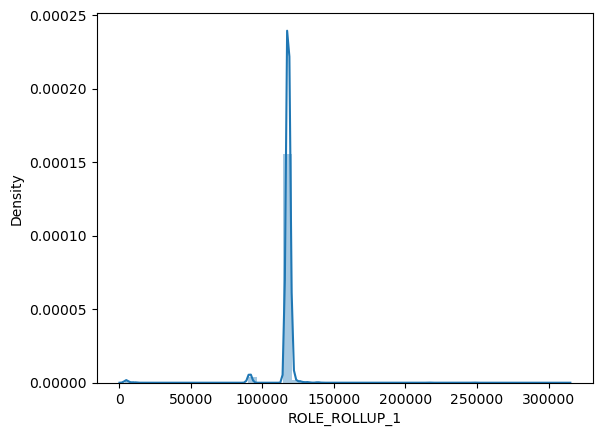

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

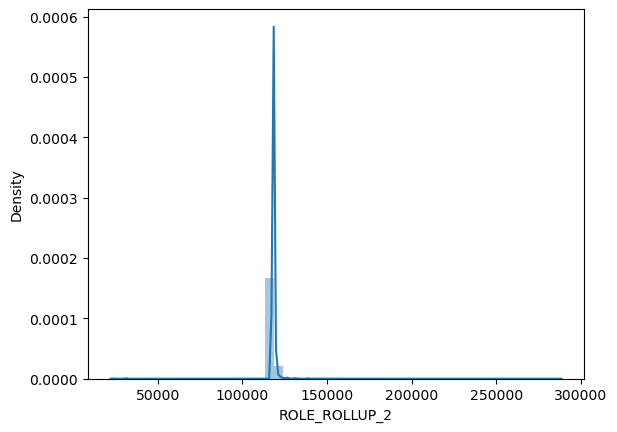

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

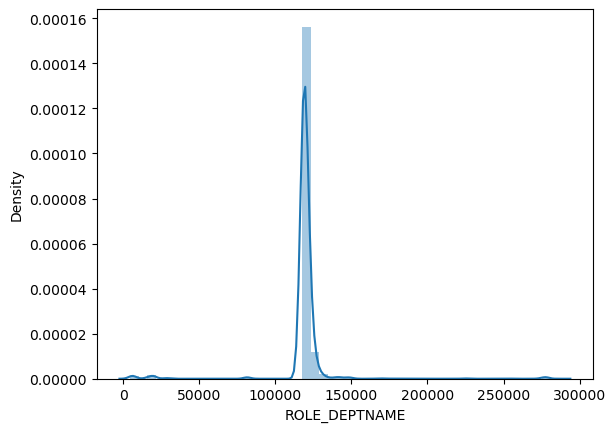

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

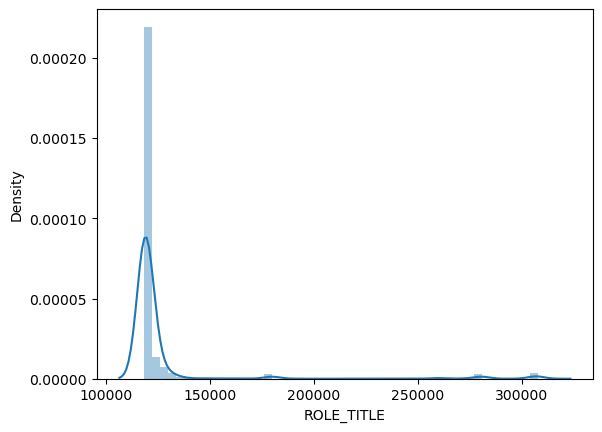

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

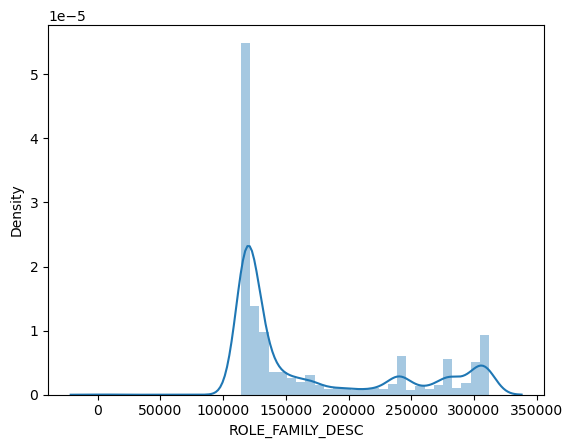

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

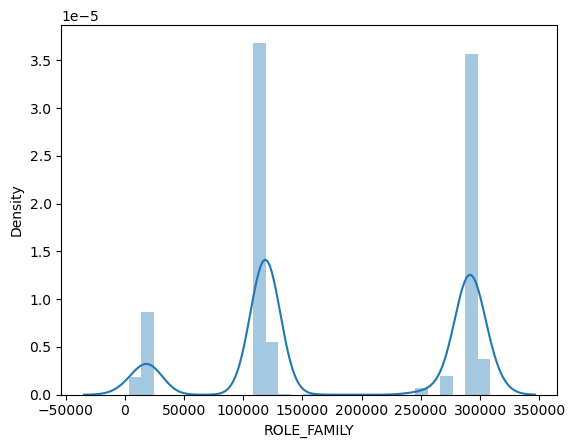

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

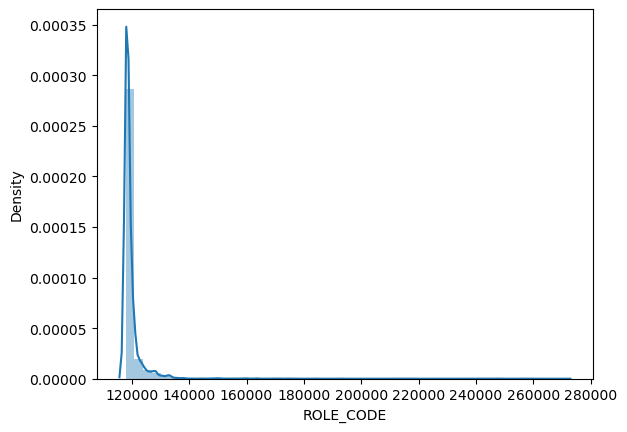

In [29]:
for i in traindf.describe().columns:
    sns.distplot(traindf[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

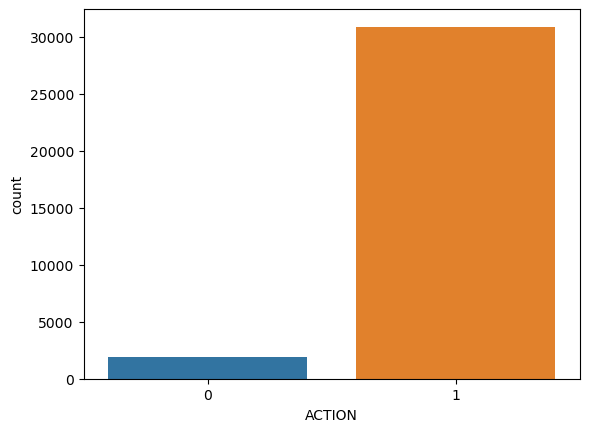

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

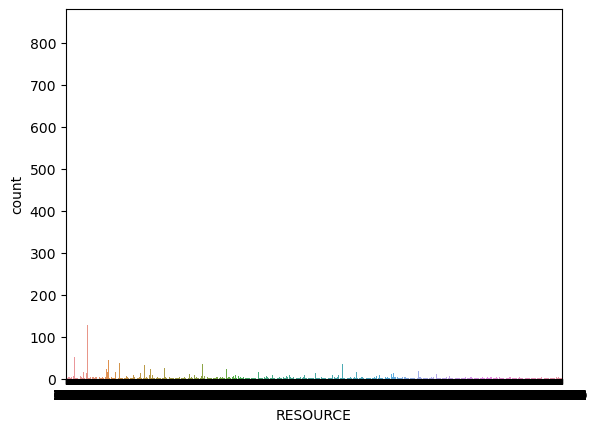

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

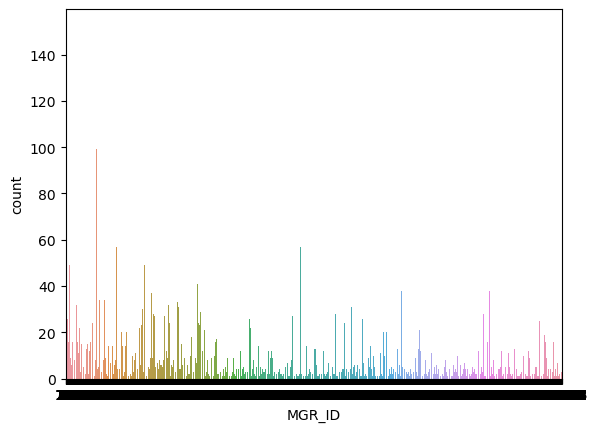

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

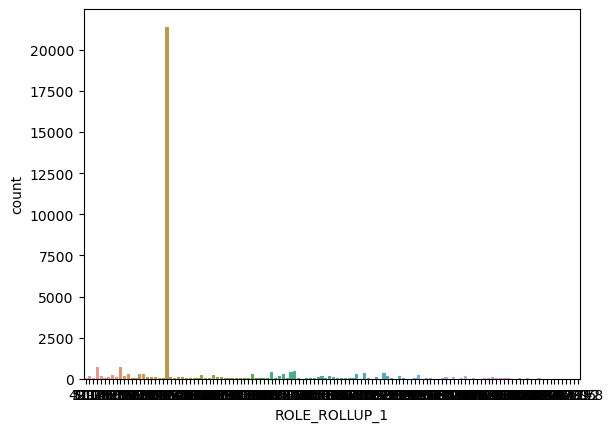

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

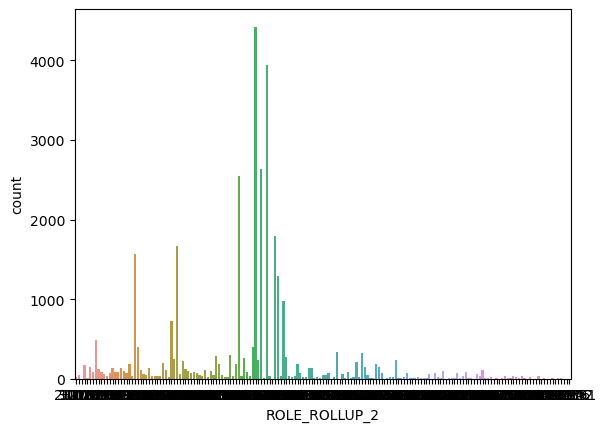

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

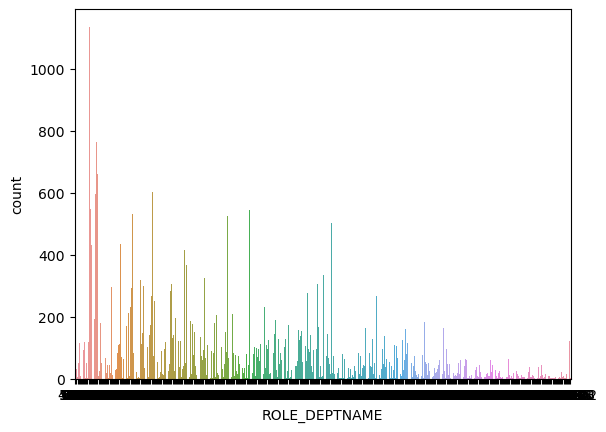

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

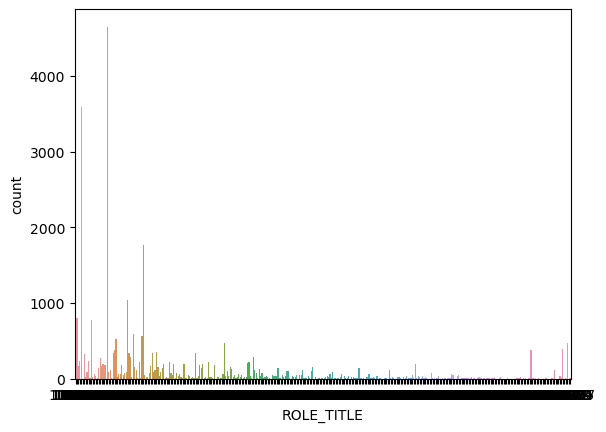

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

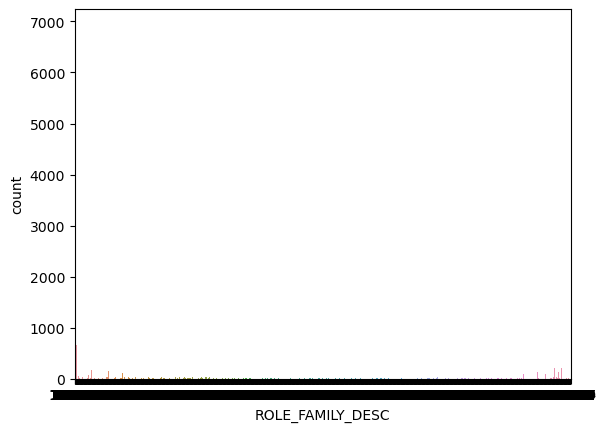

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

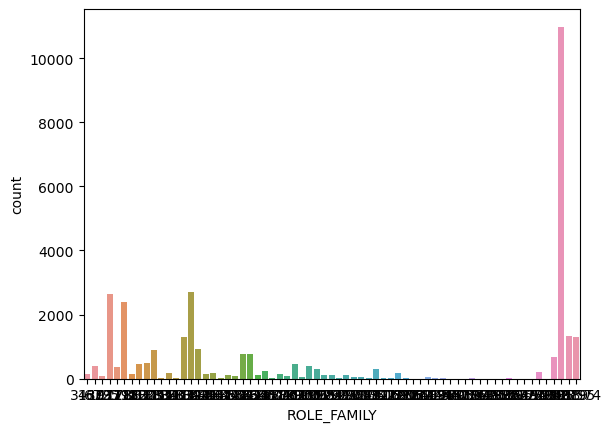

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

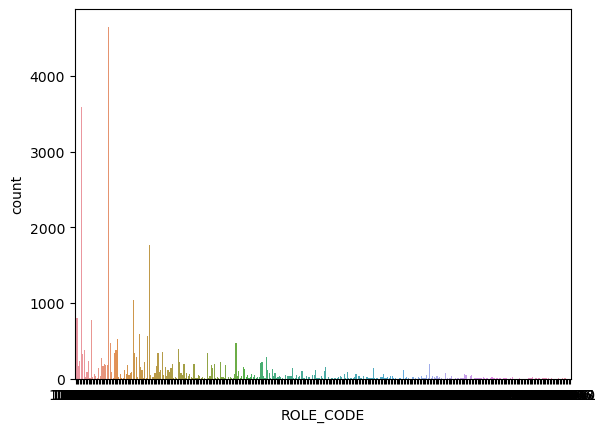

In [30]:
for i in traindf.describe().columns:
    sns.countplot(traindf[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 0, '34'),

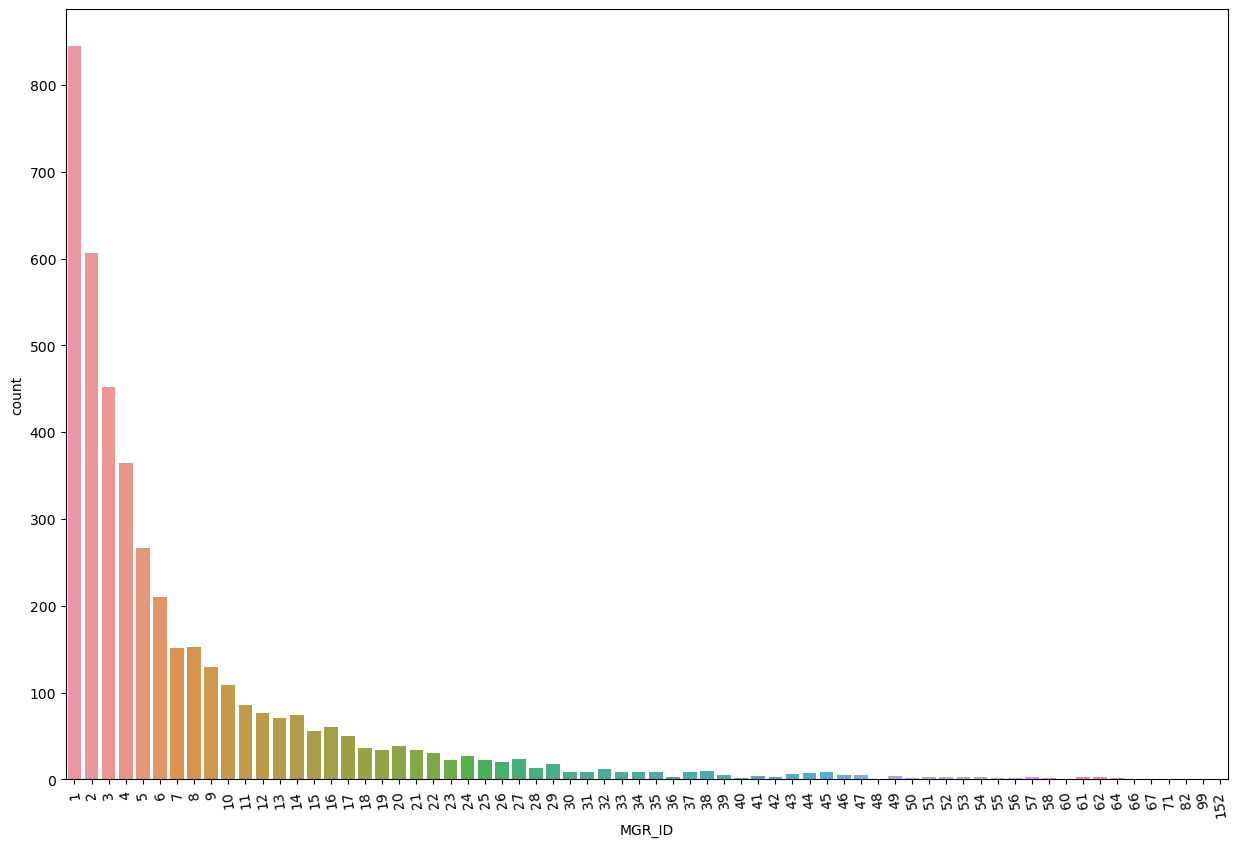

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(Train_data.MGR_ID.value_counts())
plt.xticks(rotation=98)

### Model Bilding

In [65]:
y=traindf['ACTION']
x=traindf.drop('ACTION',axis=1)
x_test=testdf.drop('id',axis=1)

In [66]:
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.20,random_state=1)

<IPython.core.display.Javascript object>

In [67]:
from catboost import CatBoostClassifier

In [68]:
%%time
params={
    'loss_function':'Logloss',
    'eval_metric':'AUC',
    'verbose':200,
    'random_seed': 1
}

catmodel_1=CatBoostClassifier(**params)

catmodel_1.fit(x_train,y_train,
               eval_set=(x_valid,y_valid),
               use_best_model=True);

Learning rate set to 0.071005
0:	test: 0.5143978	best: 0.5143978 (0)	total: 21.7ms	remaining: 21.6s
200:	test: 0.8104030	best: 0.8106794 (199)	total: 4.52s	remaining: 18s
400:	test: 0.8350248	best: 0.8354492 (393)	total: 8.45s	remaining: 12.6s
600:	test: 0.8437705	best: 0.8442173 (597)	total: 12.1s	remaining: 8.06s
800:	test: 0.8520400	best: 0.8524475 (779)	total: 16.3s	remaining: 4.04s
999:	test: 0.8568003	best: 0.8569647 (997)	total: 20.2s	remaining: 0us

bestTest = 0.8569647224
bestIteration = 997

Shrink model to first 998 iterations.
Wall time: 20.8 s


In [69]:
categorical_feature=list(range(x.shape[1]))
categorical_feature

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [70]:
%%time
params={
    'loss_function':'Logloss',
    'eval_metric':'AUC',
    'cat_features':categorical_feature,
    'verbose':200,
    'random_seed': 1
}

catmodel=CatBoostClassifier(**params)

catmodel.fit(x_train,y_train,
               eval_set=(x_valid,y_valid),
               use_best_model=True);

Learning rate set to 0.071005
0:	test: 0.5090082	best: 0.5090082 (0)	total: 69.5ms	remaining: 1m 9s
200:	test: 0.9119766	best: 0.9120781 (190)	total: 22.3s	remaining: 1m 28s
400:	test: 0.9135091	best: 0.9135895 (304)	total: 46.4s	remaining: 1m 9s
600:	test: 0.9137521	best: 0.9143986 (530)	total: 1m 10s	remaining: 46.7s
800:	test: 0.9133433	best: 0.9143986 (530)	total: 1m 37s	remaining: 24.3s
999:	test: 0.9126836	best: 0.9143986 (530)	total: 2m 2s	remaining: 0us

bestTest = 0.9143985732
bestIteration = 530

Shrink model to first 531 iterations.
Wall time: 2min 3s


###  Cross validation

In [71]:
from catboost import cv
from catboost import Pool
params={
    'loss_function':'Logloss',
    'eval_metric':'AUC',
    'verbose':200,
    'random_seed': 1
}
# pool for Dataset processing 

total_train_data = Pool(data=x,
                    label=y,
                    cat_features=categorical_feature)

scores=cv(pool=total_train_data,
         params=params,
         fold_count=4,
         seed=1,
         shuffle=True,
         stratified=True,
         )

Training on fold [0/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 32.8ms	remaining: 32.7s
200:	test: 0.8938231	best: 0.8938231 (200)	total: 23.3s	remaining: 1m 32s
400:	test: 0.8976765	best: 0.8976765 (400)	total: 52.3s	remaining: 1m 18s
600:	test: 0.9011808	best: 0.9011808 (600)	total: 1m 22s	remaining: 54.7s
800:	test: 0.9023208	best: 0.9025750 (791)	total: 1m 51s	remaining: 27.8s
999:	test: 0.9031134	best: 0.9031268 (997)	total: 2m 21s	remaining: 0us

bestTest = 0.9031267986
bestIteration = 997

Training on fold [1/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 44.1ms	remaining: 44.1s
200:	test: 0.8835559	best: 0.8840146 (166)	total: 25.8s	remaining: 1m 42s
400:	test: 0.8851675	best: 0.8851907 (399)	total: 55.3s	remaining: 1m 22s
600:	test: 0.8858301	best: 0.8858757 (597)	total: 1m 24s	remaining: 56.3s
800:	test: 0.8858879	best: 0.8861506 (758)	total: 1m 54s	remaining: 28.5s
999:	test: 0.8846742	best: 0.8861506 (758)	total: 2m 24s	remaining: 0us

bestTest = 0.8861505735
bestIte

In [73]:
feature_imp=catmodel.get_feature_importance(prettified=True)
feature_imp

,Feature Id,Importances
0,RESOURCE,19.418686
1,ROLE_DEPTNAME,17.685063
2,MGR_ID,16.820272
3,ROLE_ROLLUP_2,13.656878
4,ROLE_FAMILY_DESC,10.811677
5,ROLE_CODE,6.773803
6,ROLE_FAMILY,5.465617
7,ROLE_TITLE,5.162908
8,ROLE_ROLLUP_1,4.205095


In [79]:
prediction_probabilities=catmodel.predict_proba(x_test)
prediction_probabilities

array([[0.2313654 , 0.7686346 ],
       [0.01062612, 0.98937388],
       [0.01076689, 0.98923311],
       ...,
       [0.00955122, 0.99044878],
       [0.03561013, 0.96438987],
       [0.01022852, 0.98977148]])

In [75]:
prediction=catmodel.predict(x_test)
prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [76]:
catmodel.score(x_valid,y_valid)

0.958193469636863

In [77]:
traindf['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder